Some of the code use to jumpstart this notebook came from the 'Introduction to Deep Learning' course on Coursera

In [1]:
# Package imports
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from utils import load_datasets, plot_decision_boundary, print_cm

%matplotlib inline

np.random.seed(1492) # set a seed so that the results are consistent

In [2]:
#Load data
datasets = load_datasets(1000)


In [3]:
datasets

{'blobs': (array([[ -8.07407019,   4.0770503 ],
         [-10.44706437,   5.0597344 ],
         [ -4.68748196,   7.21252795],
         ..., 
         [ -3.82168776,   8.87985101],
         [  4.96606432,   0.04969012],
         [ -1.01208752,   2.27001454]]),
  array([5, 5, 0, 2, 2, 2, 3, 1, 0, 4, 4, 1, 1, 3, 5, 3, 5, 5, 4, 2, 1, 1, 1,
         1, 3, 3, 1, 5, 3, 3, 5, 3, 1, 5, 4, 2, 4, 3, 4, 1, 2, 4, 0, 4, 3, 4,
         1, 0, 3, 3, 0, 0, 4, 1, 5, 1, 5, 0, 2, 0, 5, 4, 4, 5, 5, 0, 1, 0, 2,
         3, 5, 2, 0, 0, 0, 4, 0, 3, 1, 3, 0, 2, 0, 2, 4, 1, 5, 2, 3, 1, 0, 1,
         4, 5, 0, 5, 3, 5, 3, 0, 1, 0, 3, 1, 2, 4, 4, 2, 5, 3, 1, 1, 4, 1, 2,
         0, 4, 1, 5, 4, 4, 2, 4, 1, 2, 4, 1, 4, 1, 2, 4, 4, 3, 3, 3, 0, 0, 4,
         4, 0, 4, 0, 2, 1, 1, 1, 1, 0, 3, 1, 3, 3, 4, 2, 5, 2, 5, 0, 2, 5, 2,
         3, 3, 1, 5, 0, 5, 1, 5, 0, 1, 2, 1, 4, 0, 0, 4, 3, 2, 2, 3, 5, 5, 0,
         4, 2, 1, 3, 4, 3, 0, 3, 3, 1, 0, 3, 2, 5, 3, 3, 1, 3, 1, 3, 0, 5, 3,
         0, 3, 4, 4, 2, 4, 5, 0, 1, 4,

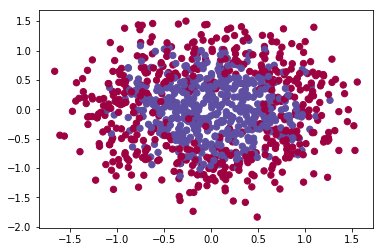

In [31]:
#Pick a dataset to use + visualize
#Change this value
dataset = "noisy_circles"

X, Y = datasets[dataset]
X = X.T

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);




In [32]:
def evaluate_classifier(clf, X, Y, title = "Chart"):
    # Plot the decision boundary for logistic regression
    plot_decision_boundary(lambda x: clf.predict(x), X, Y)
    plt.title(title)

    # Print accuracy
    predictions = clf.predict(X.T)
    cfmat = sklearn.metrics.confusion_matrix(Y, predictions)
    print("Accuracy = " + str(sklearn.metrics.accuracy_score(Y, predictions)))
    print_cm(cfmat,'RB')

# Logistic Regression

Accuracy = 0.517
              R     B
        R 255.0 245.0
        B 238.0 262.0


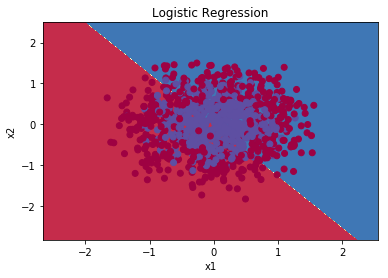

In [35]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)
evaluate_classifier(clf,X,Y,"Logistic Regression")

# SVM

Accuracy = 0.779
              R     B
        R 392.0 108.0
        B 113.0 387.0


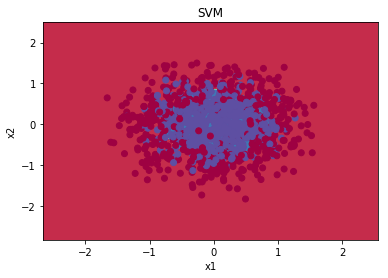

In [34]:
#Testing SVM
clf = sklearn.svm.SVC()
clf.fit(X.T, Y.T)
evaluate_classifier(clf,X,Y,"SVM")

Accuracy = 0.777
              R     B
        R 386.0 114.0
        B 109.0 391.0


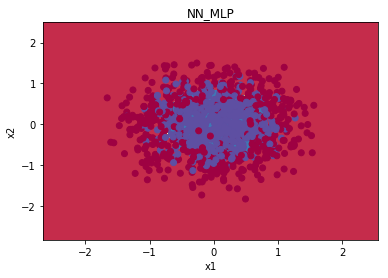

In [39]:
clf = sklearn.neural_network.MLPClassifier()
clf.fit(X.T, Y.T)
evaluate_classifier(clf,X,Y,"NN_MLP")
